In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to C:\Users\DEBJIT
[nltk_data]     DAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
x_data = pd.read_csv("x_data.csv",encoding="ISO-8859-1") # Read the CSV file

In [3]:
x_data.head() # load the 5 head rows

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
x_data.shape # Check the shape

(1599999, 6)

In [5]:
columns = ["target","ids","data","flag","user","text"] # Add columns name

df = pd.read_csv("x_data.csv",names=columns,encoding="ISO-8859-1")

In [6]:
x_data.tail() #load the 5 tail rows

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
df.shape

(1600000, 6)

In [8]:
df.info() # # Check all information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   data    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df.keys()

Index(['target', 'ids', 'data', 'flag', 'user', 'text'], dtype='object')

In [10]:
df.isnull().sum() # # Check is any missing values present or not

target    0
ids       0
data      0
flag      0
user      0
text      0
dtype: int64

In [11]:
df["target"].value_counts() # Check unique values in the target column

target
0    800000
4    800000
Name: count, dtype: int64

In [12]:
df["target"] = df["target"].map({0:0,4:1}) # mapping the target columns

In [13]:
df["target"].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [14]:
port_stem = PorterStemmer() # create the stemmer object

In [15]:
def stemming(content): # using this function all unnecessary and special chars removed
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stop_words = set(stopwords.words('english'))
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stop_words]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
df["stemmed_content"] = df["text"].apply(stemming) # Apply stremming on it

In [59]:
df.head()

,target,ids,data,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


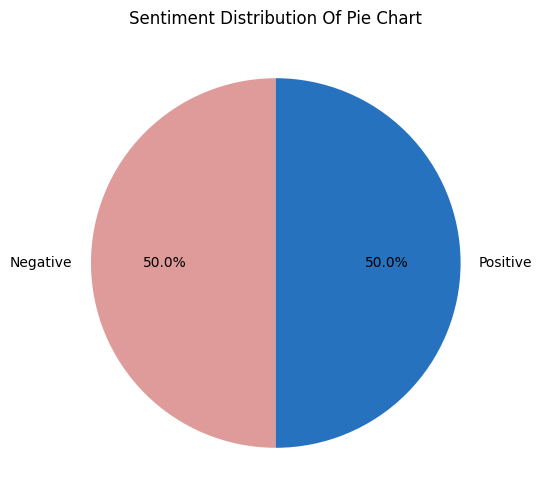

In [85]:
# Pie chart of target distribution
target_counts = df["target"].value_counts()
labels = ["Negative", "Positive"]

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#df9a9a","#2772be"])
plt.title("Sentiment Distribution Of Pie Chart")
plt.show()

In [61]:
df.drop(columns=["ids","data","flag","user","text"],axis=1,inplace=True)

In [62]:
x = df["stemmed_content"].values # Only fatch the values
y = df["target"].values


In [63]:
print(x)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [64]:
print(y)

[0 0 0 ... 1 1 1]


In [65]:
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y,random_state=42) # splitting  data into training and testing sets

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape # Check shapes about the splitting data

((1280000,), (320000,), (1280000,), (320000,))

In [67]:
vectorizer = TfidfVectorizer() # create vectorizer 

In [68]:

x_train = x_train.astype(str)
x_test = x_test.astype(str)

vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)


In [69]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9453607 stored elements and shape (1280000, 461280)>
  Coords	Values
  (0, 307108)	0.46206048815324474
  (0, 239679)	0.15130037108228483
  (0, 146067)	0.12929728405657018
  (0, 175252)	0.224070805470346
  (0, 128605)	0.22108856600702773
  (0, 4832)	0.317074267861159
  (0, 124524)	0.18318401951949756
  (0, 205794)	0.24140229063801746
  (0, 454381)	0.20169626473577715
  (0, 286478)	0.16123218610004272
  (0, 406297)	0.2978221095272138
  (0, 220296)	0.43015677907624866
  (0, 388138)	0.20555120011808467
  (0, 154767)	0.26976607043258233
  (1, 445870)	0.6361096685891185
  (1, 161801)	0.5778049407933611
  (1, 124611)	0.5113765148324884
  (2, 125319)	0.6383069130836649
  (2, 349409)	0.22232944888223494
  (2, 444761)	0.30331529032956345
  (2, 358186)	0.19837942712286838
  (2, 267649)	0.19309660201644555
  (2, 12436)	0.2529872032123258
  (2, 453420)	0.2347069337186747
  (2, 312657)	0.3154702974657607
  :	:
  (1279997, 124611)	0.253778

In [70]:
model = LogisticRegression(max_iter=5000) #initializes the logistic regression model.

In [71]:
model.fit(x_train,y_train) # Fit the model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [72]:
x_train_predict = model.predict(x_train) # predict based on train dataset
train_data_accuracy = accuracy_score(y_train,x_train_predict)
                                     
print(" the accuracy score of training data: ",train_data_accuracy)

 the accuracy score of training data:  0.7999984375


 The accuracy score of training data:  0.80039140625

In [73]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_predict)
                                     
print(" the accuracy score of test data: ",test_data_accuracy)

 the accuracy score of test data:  0.776796875


 The accuracy score of test data:  0.777078125

In [74]:
x_feature = x_test[781]
print(y_test[781])


0


In [75]:
prediction = model.predict(x_feature)
print(prediction)
if prediction == 0 :
    print("Negative Tweet")
    
else:
    print("Positive Tweet")

[0]
Negative Tweet


In [76]:
import pickle
with open("logistic.pkl","wb") as losgistic_model:
    pickle.dump(model,losgistic_model)
    
    
    
import pickle
with open("vectorizer.pkl","wb") as vector_model:
    pickle.dump(vectorizer,vector_model)
    

In [77]:
with open("logistic.pkl","rb") as losgistic_model:
    model_load = pickle.load(losgistic_model)
    
with open("vectorizer.pkl","rb") as vector_model:
    vector_load= pickle.load(vector_model)

In [78]:
predict = model_load.predict(x_test[781])
if predict == 0:
    print("Negavite")
    
else:
    print("Positive")

Negavite


In [79]:
def custom_message(text):
    stemmed_message = stemming(text)
    vector_meaasge = vector_load.transform([stemmed_message])
    sentiment = model_load.predict(vector_meaasge)
    

    if sentiment == 0:
        return "Negative Tweet"
        
    else:
        return "Positive Tweet"
        

In [94]:
print(custom_message("Today is too bad for me"))
print(custom_message("I love my country"))

Negative Tweet
Positive Tweet
